In [1]:
import numpy as np
import matplotlib.pyplot as plt
import MagneT 
import pandas as pd

In [2]:
import dash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output


In [3]:
M = MagneT.MagneT(Bsplit = 0) 
Ms = MagneT.MagneT()

Let's calculate de density of state:

In [4]:
M._Bs

0

In [5]:
g = M.gESS()
gs = Ms.gESS()

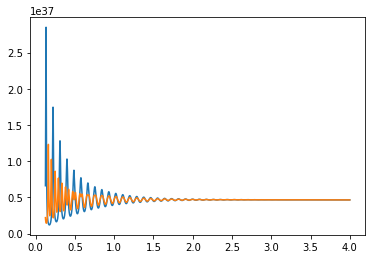

In [6]:
B = M._B
plt.plot(1/B,g[-1])
plt.plot(1/B,gs[-1])

Then the grand thermodynamic potential

In [7]:
Om = M.OmegaC()
Oms = Ms.OmegaC()

Finally, we can calculate the magnetization:

In [8]:
Mag = M.MagC()
Mags = Ms.MagC()

In [8]:
np.shape(g)

(1002, 5000)

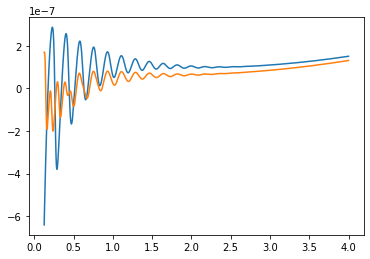

In [9]:
B = M._B[:-1]
plt.plot(1/B,Mag)
plt.plot(1/B,Mags)

In [10]:
df = pd.DataFrame({'Bfield':B, 'DOS': g[-1,:-1], 'Grand Potential': Om[:-1], 'Magnetization': Mag})

In [11]:
df.columns

Index(['Bfield', 'DOS', 'Grand Potential', 'Magnetization'], dtype='object')

Interactive visualisation using Dash (pip install Dash)
Opens at the adress: http://127.0.0.1:8050/

In [72]:
external_stylesheets = ['https://codepen.io/chriddyp/pen/bWLwgP.css']

app = dash.Dash(__name__, external_stylesheets=external_stylesheets)

available_indicators = ['Grand potential','Magnetization']

app.layout = html.Div(children=[
    html.H1(children='Magnetization in Quantum Hall regime'),
      html.Div(children='''
        Visualization to understand magnetization
    '''),
     html.Div([
            dcc.Dropdown(
                id='yaxis-column',
                options=[{'label': i, 'value': i} for i in df.columns[1:]],
                value='Fertility rate, total (births per woman)'
            )]),

    html.Div([
        dcc.Graph(
            id='example-graph')]
    )])
           

@app.callback(
    dash.dependencies.Output('example-graph', 'figure'),
    [dash.dependencies.Input('yaxis-column', 'value')])
def update_graph(yaxis_column_name):
    return {
        'data': [dict(
            x=df['Bfield'],
            y=df[yaxis_column_name],
           # text=dff[dff['Indicator Name'] == yaxis_column_name]['Country Name'],
            #customdata=dff[dff['Indicator Name'] == yaxis_column_name]['Country Name'],
            #mode='markers',
            marker={
                'size': 15,
                'opacity': 0.5,
                'line': {'width': 0.5, 'color': 'white'}
            }
        )]
    }



if __name__ == '__main__':
    app.run_server(debug=False)
    
    


 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off
Exception on /_dash-update-component [POST]
Traceback (most recent call last):
  File "C:\Users\USER\.conda\envs\notebook\lib\site-packages\pandas\core\indexes\base.py", line 2897, in get_loc
    return self._engine.get_loc(key)
  File "pandas/_libs/index.pyx", line 107, in pandas._libs.index.IndexEngine.get_loc
  File "pandas/_libs/index.pyx", line 131, in pandas._libs.index.IndexEngine.get_loc
  File "pandas/_libs/hashtable_class_helper.pxi", line 1607, in pandas._libs.hashtable.PyObjectHashTable.get_item
  File "pandas/_libs/hashtable_class_helper.pxi", line 1614, in pandas._libs.hashtable.PyObjectHashTable.get_item
KeyError: 'Fertility rate, total (births per woman)'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\USER\.conda\envs\notebook\lib\site-packages\flask\app.py", line 

Exception on /_dash-update-component [POST]
Traceback (most recent call last):
  File "C:\Users\USER\.conda\envs\notebook\lib\site-packages\pandas\core\indexes\base.py", line 2897, in get_loc
    return self._engine.get_loc(key)
  File "pandas/_libs/index.pyx", line 107, in pandas._libs.index.IndexEngine.get_loc
  File "pandas/_libs/index.pyx", line 131, in pandas._libs.index.IndexEngine.get_loc
  File "pandas/_libs/hashtable_class_helper.pxi", line 1607, in pandas._libs.hashtable.PyObjectHashTable.get_item
  File "pandas/_libs/hashtable_class_helper.pxi", line 1614, in pandas._libs.hashtable.PyObjectHashTable.get_item
KeyError: 'Fertility rate, total (births per woman)'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\USER\.conda\envs\notebook\lib\site-packages\flask\app.py", line 2446, in wsgi_app
    response = self.full_dispatch_request()
  File "C:\Users\USER\.conda\envs\notebook\lib\site-packages\flask\app.p

Exception on /_dash-update-component [POST]
Traceback (most recent call last):
  File "C:\Users\USER\.conda\envs\notebook\lib\site-packages\pandas\core\indexes\base.py", line 2897, in get_loc
    return self._engine.get_loc(key)
  File "pandas/_libs/index.pyx", line 107, in pandas._libs.index.IndexEngine.get_loc
  File "pandas/_libs/index.pyx", line 131, in pandas._libs.index.IndexEngine.get_loc
  File "pandas/_libs/hashtable_class_helper.pxi", line 1607, in pandas._libs.hashtable.PyObjectHashTable.get_item
  File "pandas/_libs/hashtable_class_helper.pxi", line 1614, in pandas._libs.hashtable.PyObjectHashTable.get_item
KeyError: 'Fertility rate, total (births per woman)'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\USER\.conda\envs\notebook\lib\site-packages\flask\app.py", line 2446, in wsgi_app
    response = self.full_dispatch_request()
  File "C:\Users\USER\.conda\envs\notebook\lib\site-packages\flask\app.p

Exception on /_dash-update-component [POST]
Traceback (most recent call last):
  File "C:\Users\USER\.conda\envs\notebook\lib\site-packages\pandas\core\indexes\base.py", line 2897, in get_loc
    return self._engine.get_loc(key)
  File "pandas/_libs/index.pyx", line 107, in pandas._libs.index.IndexEngine.get_loc
  File "pandas/_libs/index.pyx", line 131, in pandas._libs.index.IndexEngine.get_loc
  File "pandas/_libs/hashtable_class_helper.pxi", line 1607, in pandas._libs.hashtable.PyObjectHashTable.get_item
  File "pandas/_libs/hashtable_class_helper.pxi", line 1614, in pandas._libs.hashtable.PyObjectHashTable.get_item
KeyError: 'Fertility rate, total (births per woman)'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\USER\.conda\envs\notebook\lib\site-packages\flask\app.py", line 2446, in wsgi_app
    response = self.full_dispatch_request()
  File "C:\Users\USER\.conda\envs\notebook\lib\site-packages\flask\app.p

Exception on /_dash-update-component [POST]
Traceback (most recent call last):
  File "C:\Users\USER\.conda\envs\notebook\lib\site-packages\pandas\core\indexes\base.py", line 2897, in get_loc
    return self._engine.get_loc(key)
  File "pandas/_libs/index.pyx", line 107, in pandas._libs.index.IndexEngine.get_loc
  File "pandas/_libs/index.pyx", line 131, in pandas._libs.index.IndexEngine.get_loc
  File "pandas/_libs/hashtable_class_helper.pxi", line 1607, in pandas._libs.hashtable.PyObjectHashTable.get_item
  File "pandas/_libs/hashtable_class_helper.pxi", line 1614, in pandas._libs.hashtable.PyObjectHashTable.get_item
KeyError: 'Fertility rate, total (births per woman)'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\USER\.conda\envs\notebook\lib\site-packages\flask\app.py", line 2446, in wsgi_app
    response = self.full_dispatch_request()
  File "C:\Users\USER\.conda\envs\notebook\lib\site-packages\flask\app.p

Exception on /_dash-update-component [POST]
Traceback (most recent call last):
  File "C:\Users\USER\.conda\envs\notebook\lib\site-packages\pandas\core\indexes\base.py", line 2897, in get_loc
    return self._engine.get_loc(key)
  File "pandas/_libs/index.pyx", line 107, in pandas._libs.index.IndexEngine.get_loc
  File "pandas/_libs/index.pyx", line 131, in pandas._libs.index.IndexEngine.get_loc
  File "pandas/_libs/hashtable_class_helper.pxi", line 1607, in pandas._libs.hashtable.PyObjectHashTable.get_item
  File "pandas/_libs/hashtable_class_helper.pxi", line 1614, in pandas._libs.hashtable.PyObjectHashTable.get_item
KeyError: 'Fertility rate, total (births per woman)'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\USER\.conda\envs\notebook\lib\site-packages\flask\app.py", line 2446, in wsgi_app
    response = self.full_dispatch_request()
  File "C:\Users\USER\.conda\envs\notebook\lib\site-packages\flask\app.p

Exception on /_dash-update-component [POST]
Traceback (most recent call last):
  File "C:\Users\USER\.conda\envs\notebook\lib\site-packages\pandas\core\indexes\base.py", line 2897, in get_loc
    return self._engine.get_loc(key)
  File "pandas/_libs/index.pyx", line 107, in pandas._libs.index.IndexEngine.get_loc
  File "pandas/_libs/index.pyx", line 131, in pandas._libs.index.IndexEngine.get_loc
  File "pandas/_libs/hashtable_class_helper.pxi", line 1607, in pandas._libs.hashtable.PyObjectHashTable.get_item
  File "pandas/_libs/hashtable_class_helper.pxi", line 1614, in pandas._libs.hashtable.PyObjectHashTable.get_item
KeyError: 'Fertility rate, total (births per woman)'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\USER\.conda\envs\notebook\lib\site-packages\flask\app.py", line 2446, in wsgi_app
    response = self.full_dispatch_request()
  File "C:\Users\USER\.conda\envs\notebook\lib\site-packages\flask\app.p

Exception on /_dash-update-component [POST]
Traceback (most recent call last):
  File "C:\Users\USER\.conda\envs\notebook\lib\site-packages\pandas\core\indexes\base.py", line 2897, in get_loc
    return self._engine.get_loc(key)
  File "pandas/_libs/index.pyx", line 107, in pandas._libs.index.IndexEngine.get_loc
  File "pandas/_libs/index.pyx", line 131, in pandas._libs.index.IndexEngine.get_loc
  File "pandas/_libs/hashtable_class_helper.pxi", line 1607, in pandas._libs.hashtable.PyObjectHashTable.get_item
  File "pandas/_libs/hashtable_class_helper.pxi", line 1614, in pandas._libs.hashtable.PyObjectHashTable.get_item
KeyError: 'Fertility rate, total (births per woman)'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\USER\.conda\envs\notebook\lib\site-packages\flask\app.py", line 2446, in wsgi_app
    response = self.full_dispatch_request()
  File "C:\Users\USER\.conda\envs\notebook\lib\site-packages\flask\app.p

Exception on /_dash-update-component [POST]
Traceback (most recent call last):
  File "C:\Users\USER\.conda\envs\notebook\lib\site-packages\pandas\core\indexes\base.py", line 2897, in get_loc
    return self._engine.get_loc(key)
  File "pandas/_libs/index.pyx", line 107, in pandas._libs.index.IndexEngine.get_loc
  File "pandas/_libs/index.pyx", line 131, in pandas._libs.index.IndexEngine.get_loc
  File "pandas/_libs/hashtable_class_helper.pxi", line 1607, in pandas._libs.hashtable.PyObjectHashTable.get_item
  File "pandas/_libs/hashtable_class_helper.pxi", line 1614, in pandas._libs.hashtable.PyObjectHashTable.get_item
KeyError: 'Fertility rate, total (births per woman)'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\USER\.conda\envs\notebook\lib\site-packages\flask\app.py", line 2446, in wsgi_app
    response = self.full_dispatch_request()
  File "C:\Users\USER\.conda\envs\notebook\lib\site-packages\flask\app.p

Exception on /_dash-update-component [POST]
Traceback (most recent call last):
  File "C:\Users\USER\.conda\envs\notebook\lib\site-packages\pandas\core\indexes\base.py", line 2897, in get_loc
    return self._engine.get_loc(key)
  File "pandas/_libs/index.pyx", line 107, in pandas._libs.index.IndexEngine.get_loc
  File "pandas/_libs/index.pyx", line 131, in pandas._libs.index.IndexEngine.get_loc
  File "pandas/_libs/hashtable_class_helper.pxi", line 1607, in pandas._libs.hashtable.PyObjectHashTable.get_item
  File "pandas/_libs/hashtable_class_helper.pxi", line 1614, in pandas._libs.hashtable.PyObjectHashTable.get_item
KeyError: 'Fertility rate, total (births per woman)'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\USER\.conda\envs\notebook\lib\site-packages\flask\app.py", line 2446, in wsgi_app
    response = self.full_dispatch_request()
  File "C:\Users\USER\.conda\envs\notebook\lib\site-packages\flask\app.p

Exception on /_dash-update-component [POST]
Traceback (most recent call last):
  File "C:\Users\USER\.conda\envs\notebook\lib\site-packages\pandas\core\indexes\base.py", line 2897, in get_loc
    return self._engine.get_loc(key)
  File "pandas/_libs/index.pyx", line 107, in pandas._libs.index.IndexEngine.get_loc
  File "pandas/_libs/index.pyx", line 131, in pandas._libs.index.IndexEngine.get_loc
  File "pandas/_libs/hashtable_class_helper.pxi", line 1607, in pandas._libs.hashtable.PyObjectHashTable.get_item
  File "pandas/_libs/hashtable_class_helper.pxi", line 1614, in pandas._libs.hashtable.PyObjectHashTable.get_item
KeyError: 'Fertility rate, total (births per woman)'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\USER\.conda\envs\notebook\lib\site-packages\flask\app.py", line 2446, in wsgi_app
    response = self.full_dispatch_request()
  File "C:\Users\USER\.conda\envs\notebook\lib\site-packages\flask\app.p

Exception on /_dash-update-component [POST]
Traceback (most recent call last):
  File "C:\Users\USER\.conda\envs\notebook\lib\site-packages\pandas\core\indexes\base.py", line 2897, in get_loc
    return self._engine.get_loc(key)
  File "pandas/_libs/index.pyx", line 107, in pandas._libs.index.IndexEngine.get_loc
  File "pandas/_libs/index.pyx", line 131, in pandas._libs.index.IndexEngine.get_loc
  File "pandas/_libs/hashtable_class_helper.pxi", line 1607, in pandas._libs.hashtable.PyObjectHashTable.get_item
  File "pandas/_libs/hashtable_class_helper.pxi", line 1614, in pandas._libs.hashtable.PyObjectHashTable.get_item
KeyError: 'Fertility rate, total (births per woman)'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\USER\.conda\envs\notebook\lib\site-packages\flask\app.py", line 2446, in wsgi_app
    response = self.full_dispatch_request()
  File "C:\Users\USER\.conda\envs\notebook\lib\site-packages\flask\app.p

Exception on /_dash-update-component [POST]
Traceback (most recent call last):
  File "C:\Users\USER\.conda\envs\notebook\lib\site-packages\pandas\core\indexes\base.py", line 2897, in get_loc
    return self._engine.get_loc(key)
  File "pandas/_libs/index.pyx", line 107, in pandas._libs.index.IndexEngine.get_loc
  File "pandas/_libs/index.pyx", line 131, in pandas._libs.index.IndexEngine.get_loc
  File "pandas/_libs/hashtable_class_helper.pxi", line 1607, in pandas._libs.hashtable.PyObjectHashTable.get_item
  File "pandas/_libs/hashtable_class_helper.pxi", line 1614, in pandas._libs.hashtable.PyObjectHashTable.get_item
KeyError: 'Fertility rate, total (births per woman)'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\USER\.conda\envs\notebook\lib\site-packages\flask\app.py", line 2446, in wsgi_app
    response = self.full_dispatch_request()
  File "C:\Users\USER\.conda\envs\notebook\lib\site-packages\flask\app.p

Exception on /_dash-update-component [POST]
Traceback (most recent call last):
  File "C:\Users\USER\.conda\envs\notebook\lib\site-packages\pandas\core\indexes\base.py", line 2897, in get_loc
    return self._engine.get_loc(key)
  File "pandas/_libs/index.pyx", line 107, in pandas._libs.index.IndexEngine.get_loc
  File "pandas/_libs/index.pyx", line 131, in pandas._libs.index.IndexEngine.get_loc
  File "pandas/_libs/hashtable_class_helper.pxi", line 1607, in pandas._libs.hashtable.PyObjectHashTable.get_item
  File "pandas/_libs/hashtable_class_helper.pxi", line 1614, in pandas._libs.hashtable.PyObjectHashTable.get_item
KeyError: 'Fertility rate, total (births per woman)'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\USER\.conda\envs\notebook\lib\site-packages\flask\app.py", line 2446, in wsgi_app
    response = self.full_dispatch_request()
  File "C:\Users\USER\.conda\envs\notebook\lib\site-packages\flask\app.p

Exception on /_dash-update-component [POST]
Traceback (most recent call last):
  File "C:\Users\USER\.conda\envs\notebook\lib\site-packages\pandas\core\indexes\base.py", line 2897, in get_loc
    return self._engine.get_loc(key)
  File "pandas/_libs/index.pyx", line 107, in pandas._libs.index.IndexEngine.get_loc
  File "pandas/_libs/index.pyx", line 131, in pandas._libs.index.IndexEngine.get_loc
  File "pandas/_libs/hashtable_class_helper.pxi", line 1607, in pandas._libs.hashtable.PyObjectHashTable.get_item
  File "pandas/_libs/hashtable_class_helper.pxi", line 1614, in pandas._libs.hashtable.PyObjectHashTable.get_item
KeyError: 'Fertility rate, total (births per woman)'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\USER\.conda\envs\notebook\lib\site-packages\flask\app.py", line 2446, in wsgi_app
    response = self.full_dispatch_request()
  File "C:\Users\USER\.conda\envs\notebook\lib\site-packages\flask\app.p

Exception on /_dash-update-component [POST]
Traceback (most recent call last):
  File "C:\Users\USER\.conda\envs\notebook\lib\site-packages\pandas\core\indexes\base.py", line 2897, in get_loc
    return self._engine.get_loc(key)
  File "pandas/_libs/index.pyx", line 107, in pandas._libs.index.IndexEngine.get_loc
  File "pandas/_libs/index.pyx", line 131, in pandas._libs.index.IndexEngine.get_loc
  File "pandas/_libs/hashtable_class_helper.pxi", line 1607, in pandas._libs.hashtable.PyObjectHashTable.get_item
  File "pandas/_libs/hashtable_class_helper.pxi", line 1614, in pandas._libs.hashtable.PyObjectHashTable.get_item
KeyError: 'Fertility rate, total (births per woman)'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\USER\.conda\envs\notebook\lib\site-packages\flask\app.py", line 2446, in wsgi_app
    response = self.full_dispatch_request()
  File "C:\Users\USER\.conda\envs\notebook\lib\site-packages\flask\app.p

Exception on /_dash-update-component [POST]
Traceback (most recent call last):
  File "C:\Users\USER\.conda\envs\notebook\lib\site-packages\pandas\core\indexes\base.py", line 2897, in get_loc
    return self._engine.get_loc(key)
  File "pandas/_libs/index.pyx", line 107, in pandas._libs.index.IndexEngine.get_loc
  File "pandas/_libs/index.pyx", line 131, in pandas._libs.index.IndexEngine.get_loc
  File "pandas/_libs/hashtable_class_helper.pxi", line 1607, in pandas._libs.hashtable.PyObjectHashTable.get_item
  File "pandas/_libs/hashtable_class_helper.pxi", line 1614, in pandas._libs.hashtable.PyObjectHashTable.get_item
KeyError: 'Fertility rate, total (births per woman)'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\USER\.conda\envs\notebook\lib\site-packages\flask\app.py", line 2446, in wsgi_app
    response = self.full_dispatch_request()
  File "C:\Users\USER\.conda\envs\notebook\lib\site-packages\flask\app.p

Exception on /_dash-update-component [POST]
Traceback (most recent call last):
  File "C:\Users\USER\.conda\envs\notebook\lib\site-packages\pandas\core\indexes\base.py", line 2897, in get_loc
    return self._engine.get_loc(key)
  File "pandas/_libs/index.pyx", line 107, in pandas._libs.index.IndexEngine.get_loc
  File "pandas/_libs/index.pyx", line 131, in pandas._libs.index.IndexEngine.get_loc
  File "pandas/_libs/hashtable_class_helper.pxi", line 1607, in pandas._libs.hashtable.PyObjectHashTable.get_item
  File "pandas/_libs/hashtable_class_helper.pxi", line 1614, in pandas._libs.hashtable.PyObjectHashTable.get_item
KeyError: 'Fertility rate, total (births per woman)'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\USER\.conda\envs\notebook\lib\site-packages\flask\app.py", line 2446, in wsgi_app
    response = self.full_dispatch_request()
  File "C:\Users\USER\.conda\envs\notebook\lib\site-packages\flask\app.p

Exception on /_dash-update-component [POST]
Traceback (most recent call last):
  File "C:\Users\USER\.conda\envs\notebook\lib\site-packages\pandas\core\indexes\base.py", line 2897, in get_loc
    return self._engine.get_loc(key)
  File "pandas/_libs/index.pyx", line 107, in pandas._libs.index.IndexEngine.get_loc
  File "pandas/_libs/index.pyx", line 131, in pandas._libs.index.IndexEngine.get_loc
  File "pandas/_libs/hashtable_class_helper.pxi", line 1607, in pandas._libs.hashtable.PyObjectHashTable.get_item
  File "pandas/_libs/hashtable_class_helper.pxi", line 1614, in pandas._libs.hashtable.PyObjectHashTable.get_item
KeyError: 'Fertility rate, total (births per woman)'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\USER\.conda\envs\notebook\lib\site-packages\flask\app.py", line 2446, in wsgi_app
    response = self.full_dispatch_request()
  File "C:\Users\USER\.conda\envs\notebook\lib\site-packages\flask\app.p

Exception on /_dash-update-component [POST]
Traceback (most recent call last):
  File "C:\Users\USER\.conda\envs\notebook\lib\site-packages\pandas\core\indexes\base.py", line 2897, in get_loc
    return self._engine.get_loc(key)
  File "pandas/_libs/index.pyx", line 107, in pandas._libs.index.IndexEngine.get_loc
  File "pandas/_libs/index.pyx", line 131, in pandas._libs.index.IndexEngine.get_loc
  File "pandas/_libs/hashtable_class_helper.pxi", line 1607, in pandas._libs.hashtable.PyObjectHashTable.get_item
  File "pandas/_libs/hashtable_class_helper.pxi", line 1614, in pandas._libs.hashtable.PyObjectHashTable.get_item
KeyError: 'Fertility rate, total (births per woman)'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\USER\.conda\envs\notebook\lib\site-packages\flask\app.py", line 2446, in wsgi_app
    response = self.full_dispatch_request()
  File "C:\Users\USER\.conda\envs\notebook\lib\site-packages\flask\app.p

Exception on /_dash-update-component [POST]
Traceback (most recent call last):
  File "C:\Users\USER\.conda\envs\notebook\lib\site-packages\pandas\core\indexes\base.py", line 2897, in get_loc
    return self._engine.get_loc(key)
  File "pandas/_libs/index.pyx", line 107, in pandas._libs.index.IndexEngine.get_loc
  File "pandas/_libs/index.pyx", line 131, in pandas._libs.index.IndexEngine.get_loc
  File "pandas/_libs/hashtable_class_helper.pxi", line 1607, in pandas._libs.hashtable.PyObjectHashTable.get_item
  File "pandas/_libs/hashtable_class_helper.pxi", line 1614, in pandas._libs.hashtable.PyObjectHashTable.get_item
KeyError: 'Fertility rate, total (births per woman)'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\USER\.conda\envs\notebook\lib\site-packages\flask\app.py", line 2446, in wsgi_app
    response = self.full_dispatch_request()
  File "C:\Users\USER\.conda\envs\notebook\lib\site-packages\flask\app.p

Exception on /_dash-update-component [POST]
Traceback (most recent call last):
  File "C:\Users\USER\.conda\envs\notebook\lib\site-packages\pandas\core\indexes\base.py", line 2897, in get_loc
    return self._engine.get_loc(key)
  File "pandas/_libs/index.pyx", line 107, in pandas._libs.index.IndexEngine.get_loc
  File "pandas/_libs/index.pyx", line 131, in pandas._libs.index.IndexEngine.get_loc
  File "pandas/_libs/hashtable_class_helper.pxi", line 1607, in pandas._libs.hashtable.PyObjectHashTable.get_item
  File "pandas/_libs/hashtable_class_helper.pxi", line 1614, in pandas._libs.hashtable.PyObjectHashTable.get_item
KeyError: 'Fertility rate, total (births per woman)'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\USER\.conda\envs\notebook\lib\site-packages\flask\app.py", line 2446, in wsgi_app
    response = self.full_dispatch_request()
  File "C:\Users\USER\.conda\envs\notebook\lib\site-packages\flask\app.p

Exception on /_dash-update-component [POST]
Traceback (most recent call last):
  File "C:\Users\USER\.conda\envs\notebook\lib\site-packages\pandas\core\indexes\base.py", line 2897, in get_loc
    return self._engine.get_loc(key)
  File "pandas/_libs/index.pyx", line 107, in pandas._libs.index.IndexEngine.get_loc
  File "pandas/_libs/index.pyx", line 131, in pandas._libs.index.IndexEngine.get_loc
  File "pandas/_libs/hashtable_class_helper.pxi", line 1607, in pandas._libs.hashtable.PyObjectHashTable.get_item
  File "pandas/_libs/hashtable_class_helper.pxi", line 1614, in pandas._libs.hashtable.PyObjectHashTable.get_item
KeyError: 'Fertility rate, total (births per woman)'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\USER\.conda\envs\notebook\lib\site-packages\flask\app.py", line 2446, in wsgi_app
    response = self.full_dispatch_request()
  File "C:\Users\USER\.conda\envs\notebook\lib\site-packages\flask\app.p

Exception on /_dash-update-component [POST]
Traceback (most recent call last):
  File "C:\Users\USER\.conda\envs\notebook\lib\site-packages\pandas\core\indexes\base.py", line 2897, in get_loc
    return self._engine.get_loc(key)
  File "pandas/_libs/index.pyx", line 107, in pandas._libs.index.IndexEngine.get_loc
  File "pandas/_libs/index.pyx", line 131, in pandas._libs.index.IndexEngine.get_loc
  File "pandas/_libs/hashtable_class_helper.pxi", line 1607, in pandas._libs.hashtable.PyObjectHashTable.get_item
  File "pandas/_libs/hashtable_class_helper.pxi", line 1614, in pandas._libs.hashtable.PyObjectHashTable.get_item
KeyError: 'Fertility rate, total (births per woman)'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\USER\.conda\envs\notebook\lib\site-packages\flask\app.py", line 2446, in wsgi_app
    response = self.full_dispatch_request()
  File "C:\Users\USER\.conda\envs\notebook\lib\site-packages\flask\app.p

Exception on /_dash-update-component [POST]
Traceback (most recent call last):
  File "C:\Users\USER\.conda\envs\notebook\lib\site-packages\pandas\core\indexes\base.py", line 2897, in get_loc
    return self._engine.get_loc(key)
  File "pandas/_libs/index.pyx", line 107, in pandas._libs.index.IndexEngine.get_loc
  File "pandas/_libs/index.pyx", line 131, in pandas._libs.index.IndexEngine.get_loc
  File "pandas/_libs/hashtable_class_helper.pxi", line 1607, in pandas._libs.hashtable.PyObjectHashTable.get_item
  File "pandas/_libs/hashtable_class_helper.pxi", line 1614, in pandas._libs.hashtable.PyObjectHashTable.get_item
KeyError: 'Fertility rate, total (births per woman)'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\USER\.conda\envs\notebook\lib\site-packages\flask\app.py", line 2446, in wsgi_app
    response = self.full_dispatch_request()
  File "C:\Users\USER\.conda\envs\notebook\lib\site-packages\flask\app.p

Exception on /_dash-update-component [POST]
Traceback (most recent call last):
  File "C:\Users\USER\.conda\envs\notebook\lib\site-packages\pandas\core\indexes\base.py", line 2897, in get_loc
    return self._engine.get_loc(key)
  File "pandas/_libs/index.pyx", line 107, in pandas._libs.index.IndexEngine.get_loc
  File "pandas/_libs/index.pyx", line 131, in pandas._libs.index.IndexEngine.get_loc
  File "pandas/_libs/hashtable_class_helper.pxi", line 1607, in pandas._libs.hashtable.PyObjectHashTable.get_item
  File "pandas/_libs/hashtable_class_helper.pxi", line 1614, in pandas._libs.hashtable.PyObjectHashTable.get_item
KeyError: 'Fertility rate, total (births per woman)'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\USER\.conda\envs\notebook\lib\site-packages\flask\app.py", line 2446, in wsgi_app
    response = self.full_dispatch_request()
  File "C:\Users\USER\.conda\envs\notebook\lib\site-packages\flask\app.p